In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

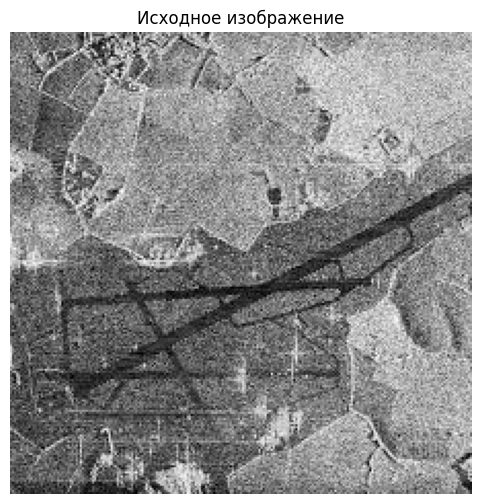

In [ ]:
image = cv2.imread('C:\\Users\\engfile\\image_processing\\dz3\\sar_3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

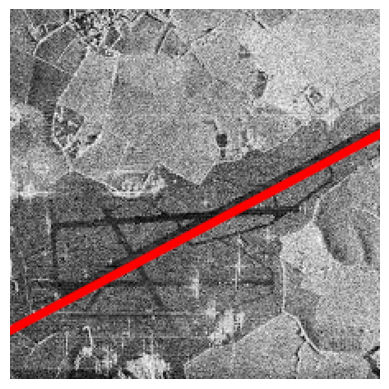

Длина самой длинной линии: 1998.8 пикселей


In [68]:
image_lines = image_rgb.copy()
canny = cv2.Canny(image_gray, 100, 150, apertureSize=3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 140)

max_length = 0
longest_line = None

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        length = np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

if longest_line is not None:
    cv2.line(image_lines, longest_line[0], longest_line[1], (255, 0, 0), 3, cv2.LINE_AA)
    
plt.imshow(image_lines)
plt.axis('off')
plt.show()
print(f"Длина самой длинной линии: {max_length:.1f} пикселей")

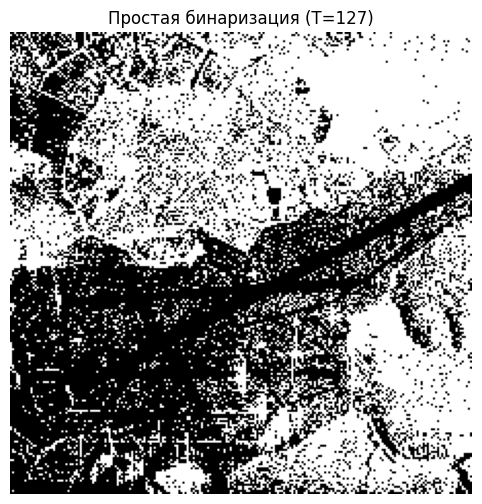

In [56]:
_, binary_simple = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 6))
plt.imshow(binary_simple, cmap='gray')
plt.title('Простая бинаризация (T=127)')
plt.axis('off')
plt.show()

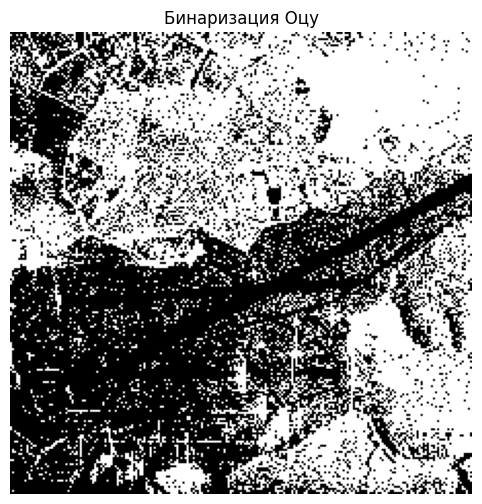

In [57]:
_, binary_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(8, 6))
plt.imshow(binary_otsu, cmap='gray')
plt.title('Бинаризация Оцу')
plt.axis('off')
plt.show()

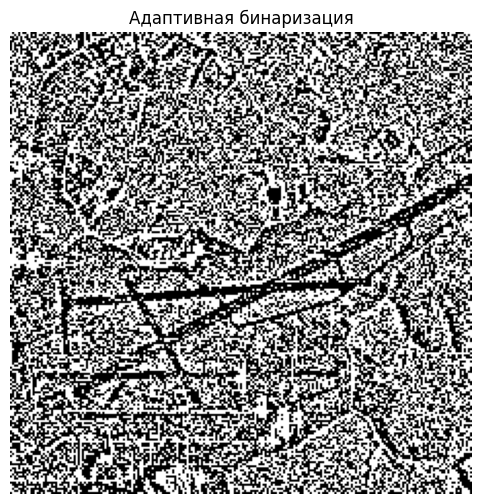

In [58]:
binary_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                      cv2.THRESH_BINARY, 15, 2)

plt.figure(figsize=(8, 6))
plt.imshow(binary_adaptive, cmap='gray')
plt.title('Адаптивная бинаризация')
plt.axis('off')
plt.show()

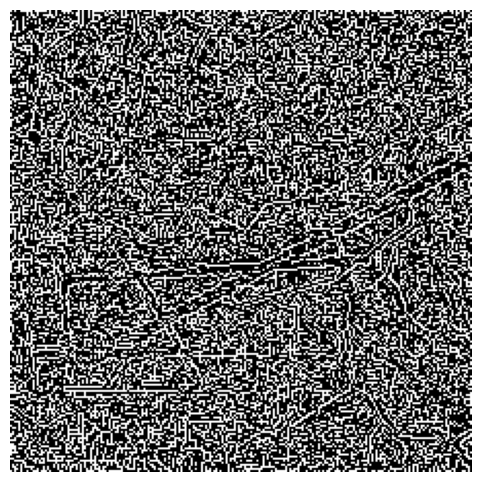

In [71]:

edges = cv2.Canny(image_gray, 30, 100)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')

plt.axis('off')
plt.show()

